# Gathering, cleaning, and organize data

## Library

In [ ]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2.12.0


## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/capstone/datasets/train.json", "r") as data_train:
  data_train = json.load(data_train)

with open("/content/drive/MyDrive/capstone/datasets/validation.json", "r") as data_validation:
  data_validation = json.load(data_validation)

In [ ]:
dt_kebakaran = pd.read_csv("/content/drive/MyDrive/capstone/datasets/kebakaran/kebakaran.csv")
dt_kebakaran['themes'] = "kebakaran"
dt_kebakaran['recommendation'] = pd.Series([['Kebakaran','Pemadam Kebakaran']]* len(dt_kebakaran))
dt_kebakaran.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,Kebakaran Gudang di Duren Sawit Jaktim Diduga ...,https://www.cnnindonesia.com/nasional/20230530...,https://akcdn.detik.net.id/visual/2023/05/30/i...,kebakaran,"[Kebakaran, Pemadam Kebakaran]"
1,Pertamina Respons Kebakaran Truk Tangki BBM di...,https://www.cnnindonesia.com/ekonomi/202305281...,https://akcdn.detik.net.id/visual/2017/05/24/9...,kebakaran,"[Kebakaran, Pemadam Kebakaran]"
2,"Jenuh Mondok, 3 Santri Bakar Asrama Tahfiz Al-...",https://www.cnnindonesia.com/nasional/20230525...,https://akcdn.detik.net.id/visual/2020/01/01/7...,kebakaran,"[Kebakaran, Pemadam Kebakaran]"
3,VIDEO: Detik-detik Gedung Runtuh usai Dilahap ...,https://www.cnnindonesia.com/internasional/202...,https://akcdn.detik.net.id/visual/2023/05/25/t...,kebakaran,"[Kebakaran, Pemadam Kebakaran]"
4,"Kemhan Rusia Dilaporkan Kebakaran, Moskow Buka...",https://www.cnnindonesia.com/internasional/202...,https://akcdn.detik.net.id/visual/2023/05/04/i...,kebakaran,"[Kebakaran, Pemadam Kebakaran]"


In [ ]:
dt_kejahatan = pd.read_csv("/content/drive/MyDrive/capstone/datasets/kejahatan/kejahatan.csv")
dt_kejahatan['themes'] = "polisi"
dt_kejahatan['recommendation'] = pd.Series([['Kejahatan','Polisi']]* len(dt_kejahatan))
dt_kejahatan.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,VIDEO: Waspada Modus Baru Penipuan Online,https://www.cnnindonesia.com/tv/20221208234440...,https://akcdn.detik.net.id/visual/2022/12/08/p...,polisi,"[Kejahatan, Polisi]"
1,Studi Buktikan Kepemilikan Anjing Bisa Turunka...,https://www.cnnindonesia.com/teknologi/2022071...,https://akcdn.detik.net.id/visual/2022/01/18/a...,polisi,"[Kejahatan, Polisi]"
2,VIDEO: Pasutri Terlibat Kejahatan,https://www.cnnindonesia.com/tv/20220419172407...,https://akcdn.detik.net.id/visual/2022/04/19/s...,polisi,"[Kejahatan, Polisi]"
3,VIDEO: Mengapa Ada Pemuka Agama yang Melakukan...,https://www.cnnindonesia.com/gaya-hidup/202204...,https://akcdn.detik.net.id/visual/2022/04/05/t...,polisi,"[Kejahatan, Polisi]"
4,VIDEO: Karyawati Tewas Dibacok Pemotor,https://www.cnnindonesia.com/tv/20220322160010...,https://akcdn.detik.net.id/visual/2022/03/22/k...,polisi,"[Kejahatan, Polisi]"


In [ ]:
dt_kesehatan = pd.read_csv("/content/drive/MyDrive/capstone/datasets/kesehatan/kesehatan.csv")
dt_kesehatan['themes'] = "rumah sakit"
dt_kesehatan['recommendation'] = pd.Series([["Rumah Sakit", "Penyakit", "Kesehatan"]]* len(dt_kesehatan))
dt_kesehatan.head()

,Judul Berita,Link Berita,Link Image,themes,recommendation
0,"Sinopsis Elysium, Bioskop Trans TV 1 Juni 2023",https://www.cnnindonesia.com/hiburan/202305311...,https://akcdn.detik.net.id/visual/2023/02/03/f...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"
1,Apakah Penderita Diabetes Bisa Sembuh Total?,https://www.cnnindonesia.com/gaya-hidup/202305...,https://akcdn.detik.net.id/visual/2020/11/09/i...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"
2,Kenapa Masih Muda Kena Diabetes? Ini 9 Penyeba...,https://www.cnnindonesia.com/gaya-hidup/202305...,https://akcdn.detik.net.id/visual/2023/04/11/i...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"
3,"Udara Jakarta Lagi Tak Sehat, Waspada 5 Penyak...",https://www.cnnindonesia.com/gaya-hidup/202305...,https://akcdn.detik.net.id/visual/2022/06/15/u...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"
4,"5 Manfaat Susu, Salah Satunya Bisa Turunkan Be...",https://www.cnnindonesia.com/gaya-hidup/202305...,https://akcdn.detik.net.id/visual/2021/09/09/i...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"


In [ ]:
dt_kesehatan = dt_kesehatan.rename(columns={"Link Image":"Link Gambar"})
dt_kesehatan.head(2)

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,"Sinopsis Elysium, Bioskop Trans TV 1 Juni 2023",https://www.cnnindonesia.com/hiburan/202305311...,https://akcdn.detik.net.id/visual/2023/02/03/f...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"
1,Apakah Penderita Diabetes Bisa Sembuh Total?,https://www.cnnindonesia.com/gaya-hidup/202305...,https://akcdn.detik.net.id/visual/2020/11/09/i...,rumah sakit,"[Rumah Sakit, Penyakit, Kesehatan]"


## Pre-processing Data

In [ ]:
keywords_kebakaran_train = clean_titles(dt_kebakaran['Judul Berita'][:100])
keywords_kebakaran_val = clean_titles(dt_kebakaran['Judul Berita'][100:])
keywords_kejahatan_train = clean_titles(dt_kejahatan['Judul Berita'][:100])
keywords_kejahatan_val = clean_titles(dt_kejahatan['Judul Berita'][100:])
keywords_kesehatan_train = clean_titles(dt_kesehatan['Judul Berita'][:100])
keywords_kesehatan_val = clean_titles(dt_kesehatan['Judul Berita'][100:])

In [ ]:
# TRAIN
tema_berita = ["kebakaran", "polisi", "rumah sakit"]

for tema in tema_berita:
  index = next((i for i, d in enumerate(data_train["berita"]) if d["tema_berita"] == tema), None)
  if index is not None:
    if tema == "kebakaran":
        data_train["berita"][index]["keywords"].extend(keywords_kebakaran_train)
    elif tema == "polisi":
        data_train["berita"][index]["keywords"].extend(keywords_kejahatan_train)
    elif tema == "rumah sakit":
        data_train["berita"][index]["keywords"].extend(keywords_kesehatan_train)

updated_data_train = json.dumps(data_train,indent=2)
data_train = json.loads(updated_data_train)

In [ ]:
# VALIDATION
tema_berita = ["kebakaran", "polisi", "rumah sakit"]

for tema in tema_berita:
  index = next((i for i, d in enumerate(data_validation["berita"]) if d["tema_berita"] == tema), None)
  if index is not None:
    if tema == "kebakaran":
        data_validation["berita"][index]["keywords"].extend(keywords_kebakaran_val)
    elif tema == "polisi":
        data_validation["berita"][index]["keywords"].extend(keywords_kejahatan_val)
    elif tema == "rumah sakit":
        data_validation["berita"][index]["keywords"].extend(keywords_kesehatan_val)

updated_data_validation = json.dumps(data_validation, indent=2)
data_validation = json.loads(updated_data_validation)

In [ ]:
def labelling(json_data):
    keywords, themes, recommendation = [], [], []
    themes_label = {}

    for news in json_data['berita']:
        for keyword in news['keywords']:
            keywords.append(keyword)
            themes.append(news['tema_berita'])
            recommendation.append(news['recommendation'])

        for tema in news['tema_berita']:
            if tema not in themes_label:
                themes_label[news['tema_berita']] = news['recommendation']

    return keywords, themes, recommendation, themes_label

In [ ]:
keywords, themes, recommendation, labels_recommendation = labelling(data_train)

validation_keywords, validation_themes, recommendation, labels_recommendation = labelling(data_validation)

# Model Build and Compile

## Tokenize

In [ ]:
# Tokenize
trunc_type='post'
padding_type='post'
tokenizer = Tokenizer()

def preprocess_text(train_data, val_data):
  all_keywords = train_data + val_data
  tokenizer.fit_on_texts(all_keywords)

  # generate sequences
  training_sequences = tokenizer.texts_to_sequences(train_data)
  validation_sequences = tokenizer.texts_to_sequences(val_data)

  word_index = tokenizer.word_index
  print(word_index)
  max_sequence_length = max(len(seq) for seq in training_sequences + validation_sequences)

  # generate pad
  padded_train_sequences = pad_sequences(training_sequences, maxlen=max_sequence_length )
  padded_val_sequences = pad_sequences(validation_sequences, maxlen=max_sequence_length)
  return padded_train_sequences, padded_val_sequences, word_index, max_sequence_length

label_mapping = {'kebakaran': 0, 'polisi': 1, 'rumah sakit': 2}
num_classes = len(label_mapping)

X_train, X_validation, word_index, max_sequence_length = preprocess_text(keywords, validation_keywords)

y_train = tf.keras.utils.to_categorical([label_mapping[label] for label in themes[:len(X_train)]], num_classes=num_classes)
y_validation = tf.keras.utils.to_categorical([label_mapping[label] for label in validation_themes[:len(X_validation)]], num_classes=num_classes)

{'kebakaran': 1, 'video': 2, 'plumpang': 3, 'pertamina': 4, 'warga': 5, 'depo': 6, 'korban': 7, 'polisi': 8, 'penyakit': 9, 'udara': 10, 'rumah': 11, 'diabetes': 12, 'polusi': 13, 'tewas': 14, 'akibat': 15, 'jakarta': 16, 'meninggal': 17, 'polri': 18, 'terbakar': 19, 'kena': 20, 'waspada': 21, 'api': 22, 'klaim': 23, 'berat': 24, 'cari': 25, 'kejahatan': 26, 'ilegal': 27, 'susu': 28, 'aturan': 29, 'salah': 30, 'turunkan': 31, 'meningkat': 32, 'total': 33, 'rekan': 34, 'penderita': 35, 'sembuh': 36, 'tv': 37, 'buronan': 38, 'sinopsis': 39, 'elysium': 40, 'bioskop': 41, 'trans': 42, 'juni': 43, 'muda': 44, 'penyebabnya': 45, 'sehat': 46, 'manfaat': 47, 'satunya': 48, 'badan': 49, 'poinpoin': 50, 'pns': 51, 'poligami': 52, 'hindari': 53, 'kebiasaan': 54, 'paruparu': 55, 'lemah': 56, 'kemendag': 57, 'bengkalis': 58, 'konsumsi': 59, 'daging': 60, 'kerbau': 61, 'mdb': 62, 'malaysia': 63, 'diinterogasi': 64, 'latah': 65, 'sekedar': 66, 'perhatian': 67, 'brigadir': 68, 'j': 69, 'orang': 70, 'r

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1,  100, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.95, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_validation, y_validation))

Epoch 1/10
136/136 [==============================] - 18s 82ms/step - loss: 0.8094 - accuracy: 0.5831 - val_loss: 0.5605 - val_accuracy: 0.7664
Epoch 2/10
136/136 [==============================] - 9s 69ms/step - loss: 0.4368 - accuracy: 0.8394 - val_loss: 0.5468 - val_accuracy: 0.7691
Epoch 3/10
136/136 [==============================] - 9s 65ms/step - loss: 0.3020 - accuracy: 0.9000 - val_loss: 0.5511 - val_accuracy: 0.7816
Epoch 4/10
136/136 [==============================] - 9s 63ms/step - loss: 0.2383 - accuracy: 0.9186 - val_loss: 0.6104 - val_accuracy: 0.7794
Epoch 5/10
136/136 [==============================] - 10s 71ms/step - loss: 0.2106 - accuracy: 0.9186 - val_loss: 0.5766 - val_accuracy: 0.7695
Epoch 6/10
136/136 [==============================] - 12s 91ms/step - loss: 0.1939 - accuracy: 0.9167 - val_loss: 0.5905 - val_accuracy: 0.7691
Epoch 7/10
136/136 [==============================] - 8s 60ms/step - loss: 0.1906 - accuracy: 0.9135 - val_loss: 0.5991 - val_accuracy: 0.7

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            143900    
                                                                 
 bidirectional (Bidirectiona  (None, 4, 512)           731136    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 4, 512)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               328192    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                        

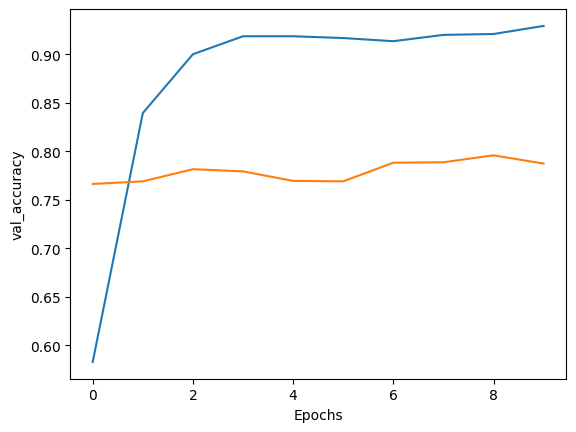

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show

plot_graphs(history, "accuracy")
plot_graphs(history, "val_accuracy")

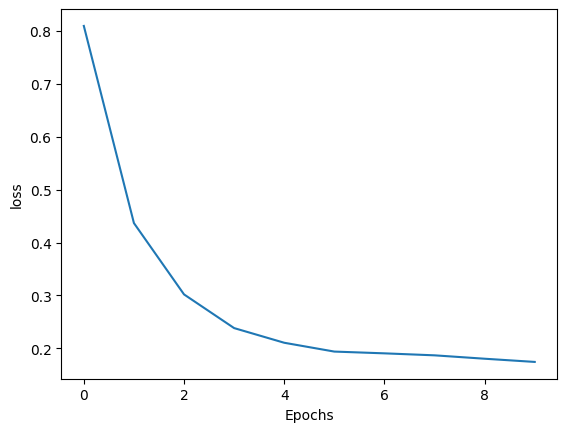

In [ ]:
plot_graphs(history, "loss")

# Model Evaluation

## Load Title Articles

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/capstone/data testing/data test.csv")

In [ ]:
data_test

,Judul Berita,themes
0,"Beri Waktu Sebulan, Korban Minta Dirut Pertami...",kebakaran
1,Urusan yang Belum Selesai dari Kebakaran Depo ...,kebakaran
2,Saat Warga Bahu-membahu Padamkan Kebakaran Kab...,kebakaran
3,"Kabel Optik di Jatinegara Terbakar, Warga: Seb...",kebakaran
4,"Kebakaran Landa Pasar Caringin Bandung, Satu O...",kebakaran
...,...,...
355,"Demi Kesehatan Mental, Apple Rilis Deretan Fit...",rumah sakit
356,7 Gaya Hidup Baik demi Terbebas dari Penyakit ...,rumah sakit
357,Jenis-jenis Vitamin yang Larut dalam Air dan C...,rumah sakit
358,Asap Kebakaran Hutan Kanada Picu Peringatan Ke...,rumah sakit


## Pre-process titles

In [ ]:
def clean_titles(titles):
    clean = []
    stopwords_id = stopwords.words('indonesian')

    for title in titles:
        title = title.lower()
        title = re.sub(r'\d+', '', title)
        title = re.sub(r'[^\w\s]', '', title)

        words = title.split()
        clean_words = [word for word in words if word not in stopwords_id]
        clean_words = ' '.join(clean_words)
        clean.append(clean_words)
        cleaned_titles = ' '.join([str(word) for word in clean])

    return cleaned_titles

## Test titles

In [ ]:
sample = data_test['Judul Berita'].sample(10)
print(list(sample))
label_counts = sample.apply(lambda x: data_test.loc[data_test['Judul Berita'] == x, 'themes'].iloc[0]).value_counts()
print(label_counts)

['Peran Kunci Laser dalam Industri Kesehatan', 'Asap Kebakaran Hutan Kanada Picu Peringatan Kesehatan di New York dan Ottawa', '8 Manfaat Kafein untuk Kesehatan yang Potensial', 'Minta Erick Thohir Selesaikan Masalah Kebakaran Depo Plumpang, Warga Tanah Merah Pengin Nonton Indonesia Vs Argentina', 'Antisipasi Serangan Siber, APPI: Perusahaan Wajib Perkuat Sistem Keamanan Digital', 'Minta Erick Thohir Selesaikan Masalah Kebakaran Depo Plumpang, Warga Tanah Merah Pengin Nonton Indonesia Vs Argentina', 'Asap Kebakaran Hutan Kanada Picu Peringatan Kesehatan di New York dan Ottawa', 'Tanda Gigitan Nyamuk yang Bawa Masalah bagi Kesehatan', 'Isak Tangis Korban Kebakaran Depo Pertamina Plumpang Ceritakan 5 Anggota Keluarga yang Terbakar Hidup-hidup', '3 Bulan Tragedi Berlalu, Pemerintah Belum Tuntaskan Masalah Kebakaran Depo Pertamina Plumpang']
kebakaran      6
rumah sakit    3
polisi         1
Name: Judul Berita, dtype: int64


In [ ]:
testing = clean_titles(sample)

In [ ]:
print(testing)

peran kunci laser industri kesehatan asap kebakaran hutan kanada picu peringatan kesehatan new york ottawa manfaat kafein kesehatan potensial erick thohir selesaikan kebakaran depo plumpang warga tanah merah pengin nonton indonesia vs argentina antisipasi serangan siber appi perusahaan wajib perkuat sistem keamanan digital erick thohir selesaikan kebakaran depo plumpang warga tanah merah pengin nonton indonesia vs argentina asap kebakaran hutan kanada picu peringatan kesehatan new york ottawa tanda gigitan nyamuk bawa kesehatan isak tangis korban kebakaran depo pertamina plumpang ceritakan anggota keluarga terbakar hiduphidup tragedi pemerintah tuntaskan kebakaran depo pertamina plumpang


In [ ]:
test_sequence = tokenizer.texts_to_sequences([testing])
padded_test_sequence = pad_sequences(test_sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_test_sequence)[0]

recommended_hobby_index = tf.argmax(prediction).numpy()
recommended_hobby = [label for label, index in label_mapping.items() if index == recommended_hobby_index][0]

print("Rekomendasi: " + recommended_hobby)

1/1 [==============================] - 0s 45ms/step
Rekomendasi: kebakaran


# Convert Model

## Saved to h5 format

In [ ]:
export_dir = '/content/drive/MyDrive/capstone/model_v2/'
model.save("my_h5_model_v2.h5")
reconstructed_model = tf.keras.models.load_model("my_h5_model_v2.h5")
tf.saved_model.save(model, export_dir)